### Project title: An analysis of paleo-present climate data

##### Project 2 for Programming for Data Analysis. Semester 2, HDip in Data Analytics at ATU, Galway 2023/24 
##### Author: Shane Keenan 
##### status: ongoing 
##### Submission due date: 22/12/2023

---


Project statement (from lecturer Brain McGinley)


- Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
- Examine Irish context:
o Climate change signals: (see Maynooth study: The emergence of a climate change 
signal in long-term Irish meteorological observations - ScienceDirect)
- Fuse and analyse data from various data sources and format fused data set as a pandas 
dataframe and export to csv and json formats
- For all of the above variables, analyse the data, the trends and the relationships between 
them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to 
published climate models if atmospheric CO2 trends continue
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)


### References

[1] 

[2]
 
[3]



In [1]:
import pandas as pd

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdates 
from matplotlib.ticker import MultipleLocator
import math as m
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# read in excel spredsheet 
# https://datatofish.com/read_excel/
# https://www.geeksforgeeks.org/how-to-import-an-excel-file-into-python-using-pandas/
# https://www.datacamp.com/tutorial/python-excel-tutorial

# Syntax: pandas.read_excel(io, sheet_name=0, header=0, names=None,….)


### data from Luthi et al Nature paper

Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382 (2008). https://doi.org/10.1038/nature06949



atmospheric carbon dioxide concentrations can be determined by measuring the composition of air trapped in ice cores from Antarctica.

METHODS SUMMARY
The analytical methods for routine CO2 measurements used at the University of
Bern and at LGGE in Grenoble are based on dry extraction techniques followed
by laser absorption spectroscopy and gas chromatography, respectively. In Bern,
four to six samples (23 3 23 3 16 mm; 8 g) from each depth level (every 550 mm)
in the ice core are measured in random order (two on the same day; the following
two after all depth intervals have been measured twice). The samples are crushed
by a cooled needle cracker under vacuum conditions. The sample container is
connected to a cold trap for several minutes to release the air from the clathrates.
Afterwards, the air is expanded to a measuring cell, where a laser is tuned six
times over the absorption line of a vibration–rotation transition of the CO2
molecule. The calibration is done using a CO2 in air standard gas
(251.65 p.p.m.v.) scaled on the World Meteorological Organization mole fraction scale.
In Grenoble, on every depth level one to three samples of about 40 g of ice are
crushed under vacuum conditions. About 20 min later, the extracted gas is
expanded in the sample loop of the gas chromatograph and analysed.
Depending on the amount of the extracted air, three to five successive analyses
are done. To avoid the possible influence of the water vapour injected with the
gas, the CO2 ratio is calculated as the ratio between the CO2 peak and the air
(O2 1 N2) peak. The calibration is done using an Air Liquide standard scaled on
three CSIRO standards (260.3 p.p.m.v., 321.1 p.p.m.v. and 172.8 p.p.m.v.).

In [3]:
# header 

# Dome C (611-800 kyr BP)				
# Lüthi et al. (sub)
# University of Bern				LGGE in Grenoble

df = pd.read_excel(r"C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Programming for Data Analysis\\prog_data_analysis\\project2\\data\\41586_2008_BFnature06949_MOESM31_ESM.xls", sheet_name="1.  new CO2 data", header = 6)

In [4]:
df

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
0,3026.58,611269,257.8,2.1,3061.71,667435.0,178.5
1,3030.97,616164,252.6,0.6,3063.98,670124.0,189.0
2,3036.44,623109,243.3,2.8,3085.78,688035.0,234.0
3,3040.87,630183,204.4,0.9,3086.88,688751.0,235.4
4,3043.07,635364,195.0,1.5,3087.98,689444.0,241.0
...,...,...,...,...,...,...,...
242,3187.87,794608,199.4,1.7,NaN,NaN,NaN
243,3188.23,795202,195.2,2.0,NaN,NaN,NaN
244,3188.98,796467,189.3,2.1,NaN,NaN,NaN
245,3189.33,797099,188.4,1.4,NaN,NaN,NaN


In [5]:
df.describe()

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
count,247.000000,247.000000,247.000000,247.000000,47.000000,47.000000,47.00000
mean,3123.501134,723999.655870,216.088664,1.248178,3148.893617,750698.170213,222.33617
std,40.589369,41319.636469,20.259783,0.614713,35.427754,36597.113508,20.93293
min,3026.580000,611269.000000,171.600000,0.200000,3061.710000,667435.000000,178.50000
25%,3089.115000,690175.500000,203.950000,0.800000,3130.880000,729879.000000,208.15000
50%,3125.530000,723464.000000,218.400000,1.100000,3160.580000,760338.000000,224.20000
75%,3159.535000,759094.500000,231.850000,1.600000,3174.330000,778397.500000,238.95000
max,3190.080000,798512.000000,260.300000,3.700000,3190.280000,798893.000000,256.60000


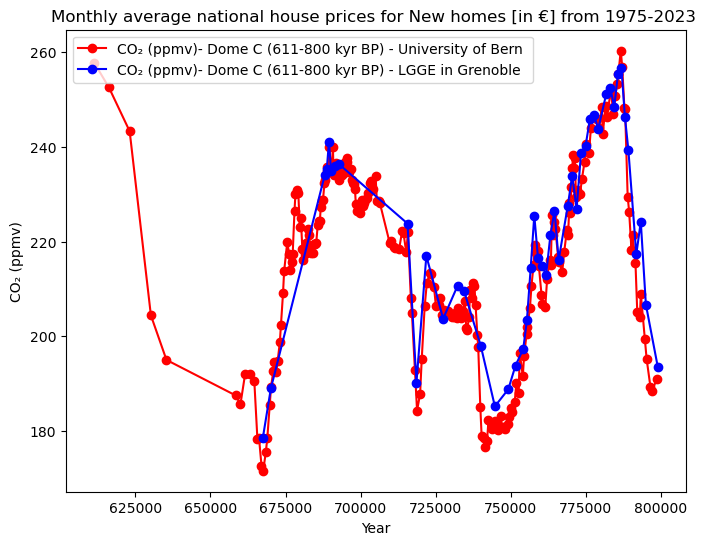

In [6]:
#https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df['EDC3_gas_a (yr)'], df['CO2 (ppmv)'], color='red', label='CO\u2082 (ppmv)- Dome C (611-800 kyr BP) - University of Bern ', marker = 'o')
plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='CO\u2082 (ppmv)- Dome C (611-800 kyr BP) - LGGE in Grenoble',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082 (ppmv)')
plt.title('Monthly average national house prices for New homes [in \u20AC] from 1975-2023 ')
plt.legend(loc="upper left")
plt.show()

In [7]:

df2 = pd.read_excel(r"C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Programming for Data Analysis\\prog_data_analysis\\project2\\data\\41586_2008_BFnature06949_MOESM31_ESM.xls", sheet_name="2.  Vostok-TD-Dome C", header = 6)

In [8]:
df2

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1,Depth (m).2,tentatively synchronized on EDC3_gas_a (yr),CO2 (ppmv).2,...,Depth (m).4,EDC3_gas_a (yr).3,CO2 (ppmv).4,Depth (m).5,EDC3_gas_a (yr).4,CO2 (ppmv).5,sigma (ppmv).3,Depth (m).6,EDC3_gas_a (yr).5,CO2 (ppmv).6
0,102.83,137.0,280.4,1.8,149.10,2690,284.7,380.82,18906.0,190.5,...,2700.77,392544.0,259.5,3026.58,611269.0,257.8,2.1,3061.71,667435.0,178.5
1,106.89,268.0,274.9,0.7,173.10,3897,272.7,382.42,23379.0,189.1,...,2702.97,393579.0,273.6,3030.97,616164.0,252.6,0.6,3063.98,670124.0,189.0
2,107.20,279.0,277.9,0.7,177.40,4124,268.1,382.76,24011.0,189.0,...,2705.17,394560.0,260.7,3036.44,623109.0,243.3,2.8,3085.78,688035.0,234.0
3,110.25,395.0,279.1,1.3,228.60,6735,262.2,383.54,25337.0,187.7,...,2713.97,398086.0,276.3,3040.87,630183.0,204.4,0.9,3086.88,688751.0,235.4
4,110.50,404.0,281.9,1.1,250.30,7873,254.5,385.33,27507.0,195.2,...,2718.37,399722.0,277.1,3043.07,635364.0,195.0,1.5,3087.98,689444.0,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,NaN,NaN,NaN,NaN,3340.39,428394,229.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,3343.39,433925,199.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,3346.51,437580,201.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,NaN,NaN,NaN,NaN,3346.56,437601,207.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


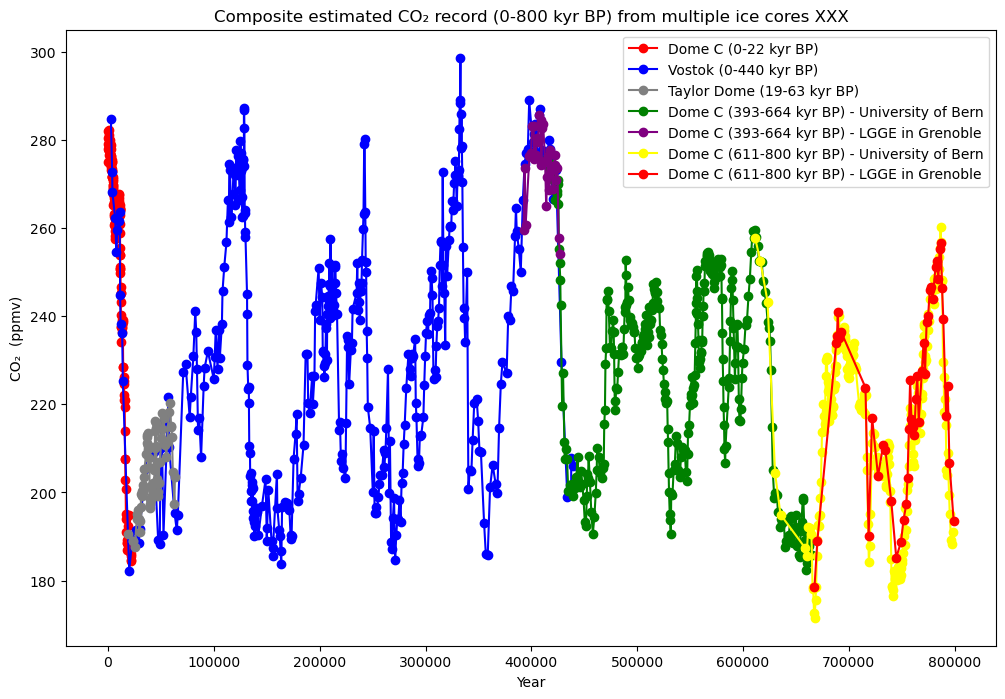

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(df2['EDC3_gas_a (yr)'], df2['CO2 (ppmv)'], color='red', label='Dome C (0-22 kyr BP)', marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).1'], df2['CO2 (ppmv).1'], color='Blue', label='Vostok (0-440 kyr BP)',marker = 'o')
plt.plot(df2['tentatively synchronized on EDC3_gas_a (yr)'], df2['CO2 (ppmv).2'], color='grey', label='Taylor Dome (19-63 kyr BP)',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).2'], df2['CO2 (ppmv).3'], color='green', label='Dome C (393-664 kyr BP) - University of Bern',marker = 'o')

plt.plot(df2['EDC3_gas_a (yr).3'], df2['CO2 (ppmv).4'], color='purple', label='Dome C (393-664 kyr BP) - LGGE in Grenoble',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).4'], df2['CO2 (ppmv).5'], color='yellow', label='Dome C (611-800 kyr BP) - University of Bern',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).5'], df2['CO2 (ppmv).6'], color='red', label='Dome C (611-800 kyr BP) - LGGE in Grenoble',marker = 'o')


plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores XXX')
plt.legend(loc="upper right")
plt.show()

In [10]:
# Composite CO2 record (0-800 kyr BP)	
# 0-22 kyr BP:	Dome C (Monnin et al. 2001) measured at University of Bern
# 22-393 kyr BP:	Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005) measured at LGGE in Grenoble
# 393-416 kyr BP:	Dome C (Siegenthaler et al. 2005) measured at LGGE in Grenoble
# 416-664 kyr BP:	Dome C (Siegenthaler et al. 2005)  measured at University of Bern
# 664-800 kyr BP:	Dome C (Luethi et al. (sub)) measured at University of Bern
df_COM = pd.read_excel(r"C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Programming for Data Analysis\\prog_data_analysis\\project2\\data\\41586_2008_BFnature06949_MOESM31_ESM.xls", sheet_name="3.  Composite CO2", header = 6)

df_COM

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


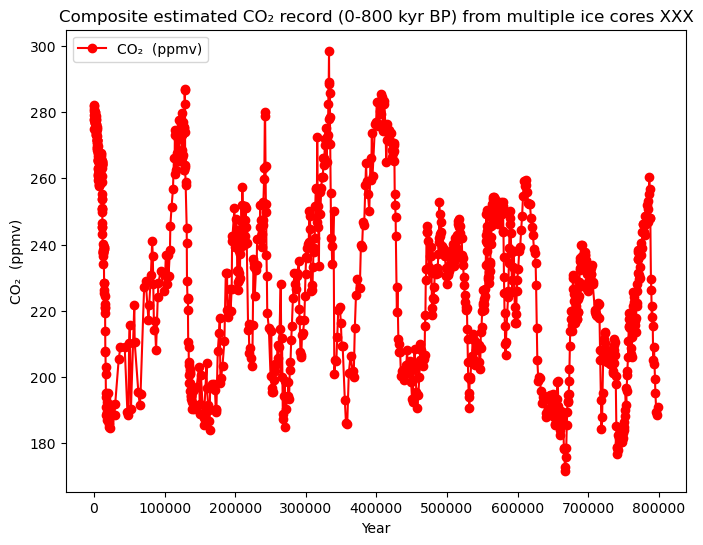

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='red', label='CO\u2082  (ppmv)', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores XXX')
plt.legend(loc="upper left")
plt.show()

### Import CO2 data from IPCC Report

In [12]:
# Composite CO2 record (0-800 kyr BP)	
# -51-1800 yr BP:'	Law Dome (Rubino et al., 2013)
# 1.8-2 kyr BP:	Law Dome (MacFarling Meure et al., 2006)
# 2-11 kyr BP:	Dome C (Monnin et al., 2001 + 2004)
# 11-22 kyr BP:	WAIS (Marcott et al., 2014) minus 4 ppmv (see text)
# 22-40 kyr BP:	Siple Dome (Ahn et al., 2014)
# 40-60 kyr BP:	TALDICE (Bereiter et al., 2012)
# 60-115 kyr BP:	EDML (Bereiter et al., 2012)
# 105-155 kyr BP:	Dome C Sublimation (Schneider et al., 2013)
# 155-393 kyr BP:	Vostok (Petit et al., 1999)
# 393-611 kyr BP:	Dome C (Siegenthaler et al., 2005)
# 612-800 kyr BP:	Dome C (Bereiter et al., 2014)
# Gasage: AICC2012 (Bazin et al., 2013) except for Law Dome, WAIS and Siple Dome (see text for more details).	
# Sigma: Where no individual sigma is given, we use average for system/record.	


df_IPCC = pd.read_excel(r"C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Programming for Data Analysis\\prog_data_analysis\\project2\\data\\grl52461-sup-0003-supplementary.xls", sheet_name="CO2 Composite", header = 14)

In [13]:
df_IPCC.head(65)
df_IPCC.columns = df_IPCC.columns.str.strip()
print(df_IPCC.columns)


Index(['Gasage (yr BP)', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')


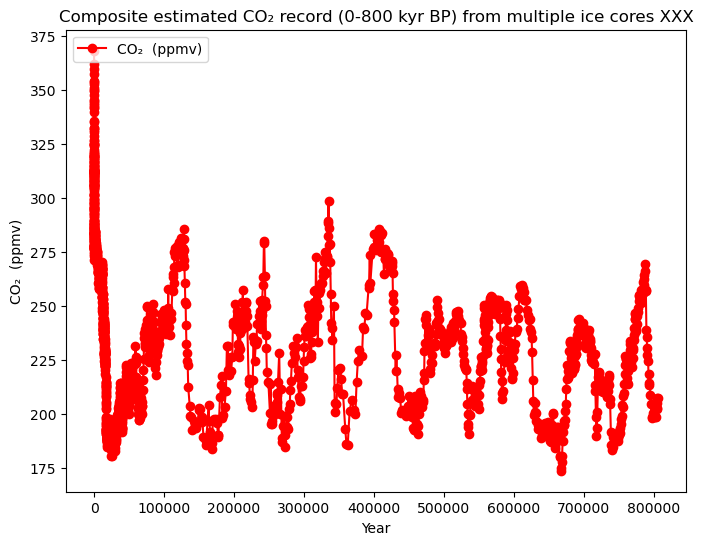

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='red', label='CO\u2082  (ppmv)', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores XXX')
plt.legend(loc="upper left")
plt.show()

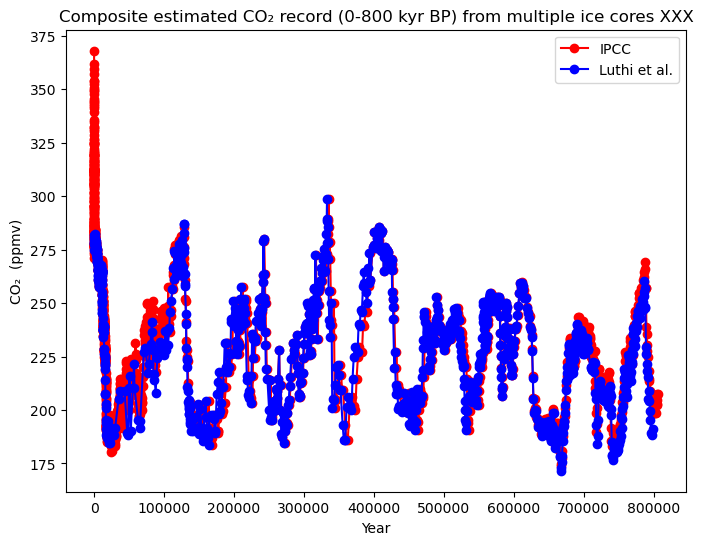

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='red', label='IPCC', marker = 'o')
plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='Luthi et al.', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores XXX')
plt.legend(loc="upper right")
plt.show()


### Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC 

In [16]:

df_temp1 = pd.read_excel(r"C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Programming for Data Analysis\\prog_data_analysis\\project2\\data\\epicaDC.deuttemp.EDC3-AICC.xls", sheet_name="epicaDC.deuttemp.EDC3-AICC.txt", header = 0)

In [17]:
df_temp1

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


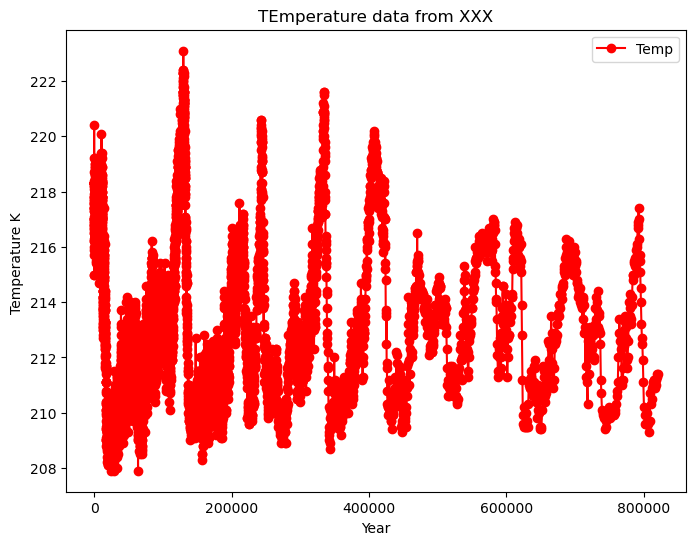

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_temp1['EDC3béta'], df_temp1['temp'], color='red', label='Temp', marker = 'o')
#plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='Luthi et al.', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('Temperature K ')
plt.title('TEmperature data from XXX')
plt.legend(loc="upper right")
plt.show()

PLot Jouzel temperature data against the composite data from Luthi et al. 
|

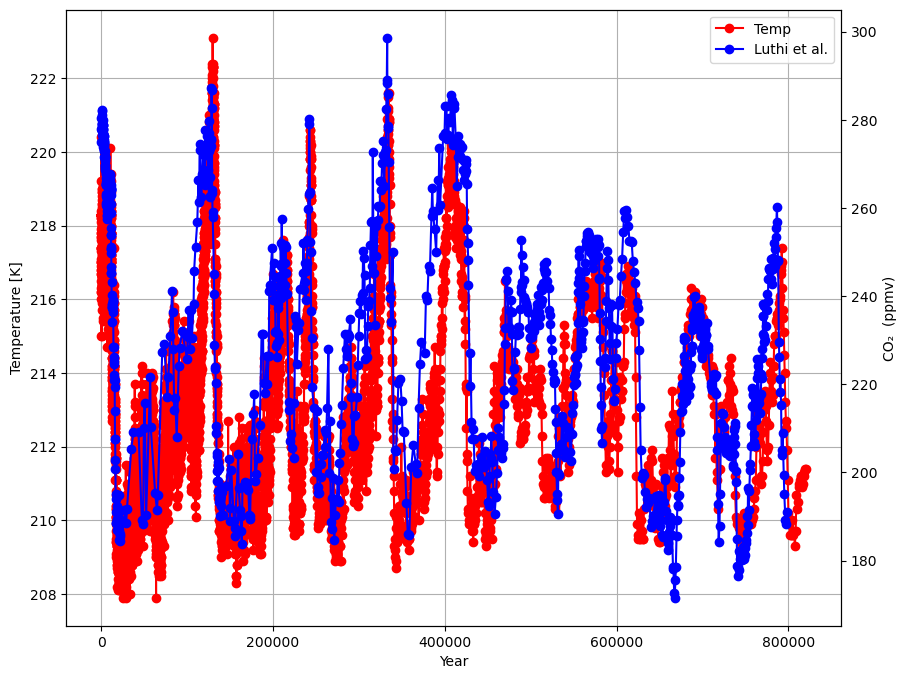

In [35]:
#fig, ax = plt.subplots(figsize=(8, 6))
#plt.plot(df_temp1['EDC3béta'], df_temp1['temp'], color='red', label='Temp', marker = 'o')
#plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='Luthi et al.', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
#plt.xlabel('Year')
#plt.ylabel('Temperature K ')
#plt.title('TEmperature data from XXX')
#plt.legend(loc="upper right")
#plt.show()
#all labels on one legend:  https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
# arguement for fig.add_subplot: https://stackoverflow.com/questions/3584805/what-does-the-argument-mean-in-fig-add-subplot111


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp1['EDC3béta'], df_temp1['temp'], color='red', label='Temp', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [K]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper right')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO\u2082  (ppmv)')
ax.grid(True) 
#ax2.title('Total Population Estimates (Persons 15 and over) 1950 - 2023')
#ax2.legend(loc=1)
#ax2.show()